In [1]:
import warnings

warnings.simplefilter("ignore")

import math

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from src.load_data import *
from src.graphs import *
from src.statistical_tests import *
from src.outlier_filtering import outliers_filtering


## Few notes:
* **total_clearance_between_visit** - wzgledem poprzedniej wizyty
* **clearance_between_visit** - wzgledem poczatku
* we group to **nereast** time group 


#### To-dos:
* Sprawdz ilosc grup z peaku w gory!
* Sprawdzic linear fit i non-linear fit
* Sprawdz rozne 
* Sprawdz methodologie
* Sila statystyczna (p-value)
* Sprawdz rozne kwartaly
* Pogrobic linie

#### Few **old** notes:
* The table above should include all information You need
* `wizyta po ilu zabiegach` -> can have some skipped zabiegy & can start at other point than 0
* `czas` -> defined as czas between this and next visit



# Hard-Coded Area:

In [2]:
non_moved_df = get_data(format_type='all')
moved_df = get_data(format_type='moved_to_0')
non0s_df = get_data(format_type='all_without_0s')

print('looking at the moved data:')
moved_df.head(10)

default time group has GROUPS defined as: [0, 90, 180, 270, 360]
default time group has GROUPS defined as: [0, 90, 180, 270, 360]
default time group has GROUPS defined as: [0, 90, 180, 270, 360]
looking at the moved data:


,surname,time,summed_time,time_group,visit_number,total_clearance_effect_between_visit,total_clearence_effect_wzgledem_poczatku,------------,unmoved_visit_nr
0,1.Gasek,57,57,1,1,10.43594,10.435942,,1
1,1.Gasek,958,1015,4,2,-1.90988,8.725376,,2
2,1.Gasek,70,1085,1,3,-3.15234,5.848092,,3
3,1.Gasek,63,1148,1,4,26.20423,30.519873,,4
4,1.Gasek,238,1386,3,5,-0.99610,29.827784,,5
5,2. Kołodziejska,217,217,2,1,66.95658,66.956580,,1
6,2. Kołodziejska,42,259,0,2,20.93472,73.874130,,2
8,2. Kołodziejska,26,306,0,5,-59.55360,71.032640,,5
9,2. Kołodziejska,294,600,3,6,76.67272,93.242700,,6
11,4. Krzysztoń,35,66,0,1,-18.03010,-13.664000,,3


### Apply outlier filtering:

In [3]:
non_moved_df, removed_data1 = outliers_filtering(non_moved_df, outlier_filter_type = 'quantile')
moved_df, removed_data2 = outliers_filtering(moved_df, outlier_filter_type = 'quantile')
non0s_df, removed_data3 = outliers_filtering(non0s_df, outlier_filter_type = 'quantile')

#### Scatter of what is being filtered out:

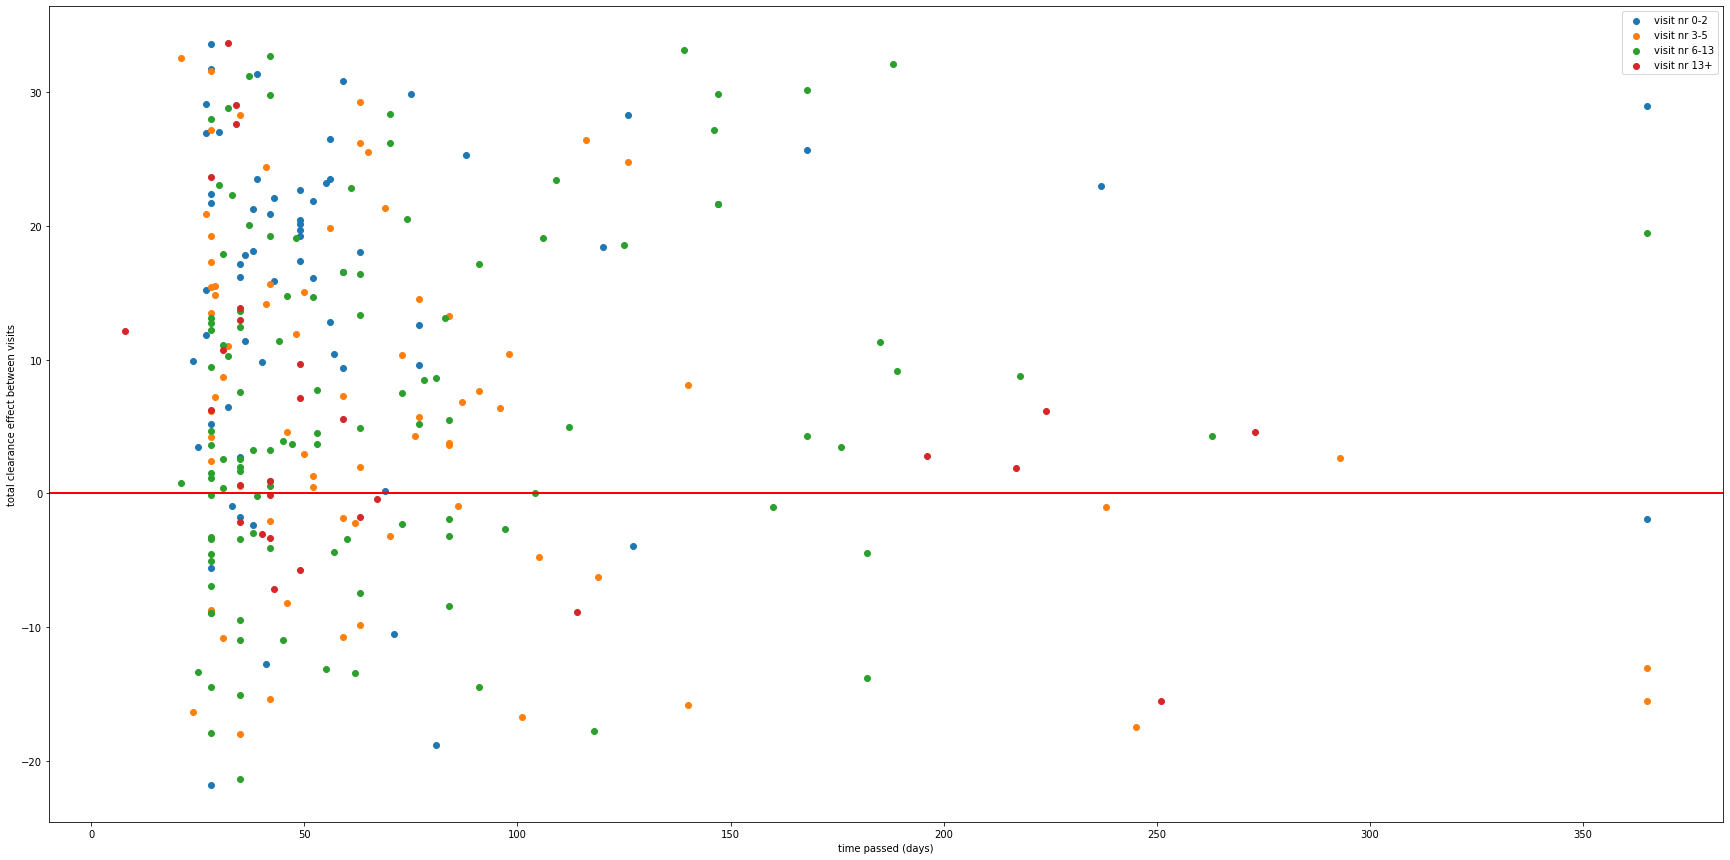

In [4]:
plt.figure(figsize=(30,15))

df1 = non_moved_df.loc[non_moved_df['visit_number'].isin([1,2])]
df2 = non_moved_df.loc[non_moved_df['visit_number'].isin([3,4,5])]
df3 = non_moved_df.loc[non_moved_df['visit_number'].isin([6,7,8,9,10,11,12,13])]
df5 = non_moved_df.loc[non_moved_df['visit_number'] > 13]


scatter_plot_against_time(df1, label = 'visit nr 0-2', plot_linear_fit= False)
scatter_plot_against_time(df2, label = 'visit nr 3-5', plot_linear_fit= False)
scatter_plot_against_time(df3, label = 'visit nr 6-13', plot_linear_fit= False)
scatter_plot_against_time(df5, label = 'visit nr 13+', plot_linear_fit= False)
plt.legend()

### Wyniki - totalna poprawa:

In [5]:
get_stats_for_abstract(df = None, format_type = 'all')

default time group has GROUPS defined as: [0, 90, 180, 270, 360]
median of maximum total clearence: 59.09456
% of patients that had a total_clearence of minimum 25%: 81.9672131147541
% of patients that had a total_clearence of minimum 50%: 67.21311475409836
% of patients that had a total_clearence of minimum 75%: 24.59016393442623
% of patients that had a total_clearence of minimum 90%: 4.918032786885246


,surname,total_clearence_effect_wzgledem_poczatku
0,1.Gasek,30.519873
1,10.Będzinowski szyja,70.360110
2,11. Cicha-kwiecień,52.934780
3,12. Januszewska,60.984150
4,13.Zborowski,77.379030
...,...,...
56,7. Kowal,82.977240
57,70. Wójcicki,83.173308
58,71. Zając,9.855161
59,8.Wierny,71.835400


In [6]:
get_stats_for_abstract2(df = None, format_type = 'all', visit_number_buckets = [0,2,5,10,15,20])

default time group has GROUPS defined as: [0, 90, 180, 270, 360]
bucket: 2
bucket: 5
bucket: 10
bucket: 15
bucket: 20
[28.46557, 45.48351, 56.577381579999994, 56.97438, 56.9571]


,surname,total_clearence_effect_wzgledem_poczatku
0,1.Gasek,30.519873
1,10.Będzinowski szyja,60.169450
2,11. Cicha-kwiecień,52.934780
3,12. Januszewska,60.984150
4,13.Zborowski,77.379030
...,...,...
56,7. Kowal,82.977240
57,70. Wójcicki,83.173308
58,71. Zając,9.855161
59,8.Wierny,71.835400


In [7]:
# Print some overall info such as:
# nr of people w. different number of visits
# nr of people in different waiting buckets

# Main Graphs
### Total clearence compared to start:

default time group has GROUPS defined as: [0, 90, 180, 270, 360]
default time group has GROUPS defined as: [0, 90, 180, 270, 360]
default time group has GROUPS defined as: [0, 90, 180, 270, 360]


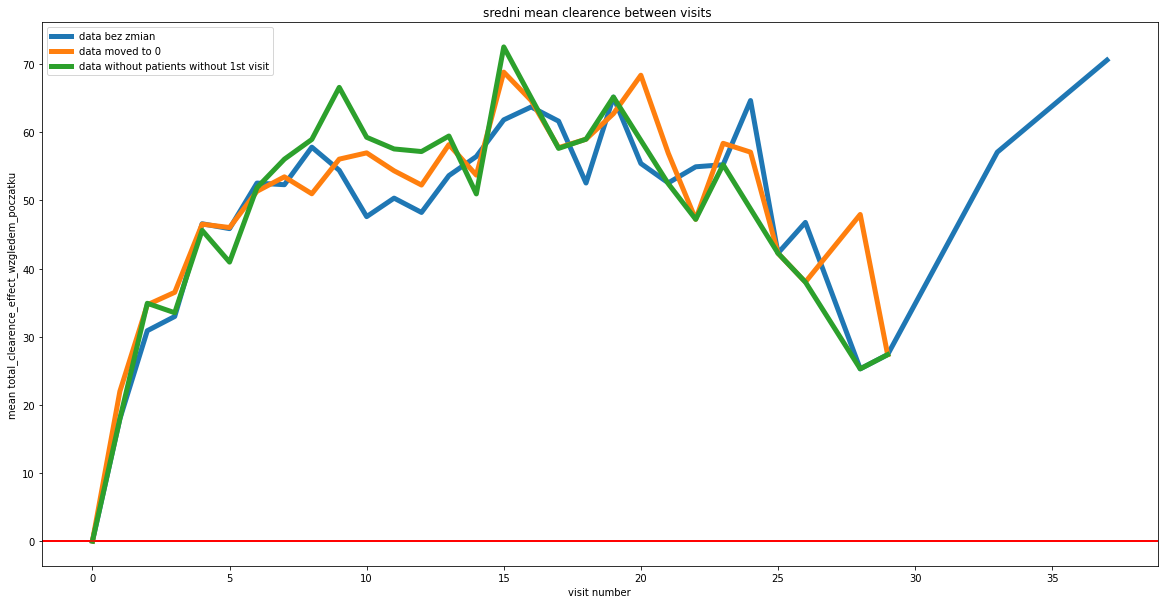

In [8]:
plt.figure(figsize=(20,10))
data, _ = outliers_filtering(get_data(format_type='all',remove_minus_ones = False ))
data2, _ = outliers_filtering(get_data(format_type='moved_to_0',remove_minus_ones = False ))
data3, _ = outliers_filtering(get_data(format_type='all_without_0s',remove_minus_ones = False ))

agg_column_graph(data, label = 'data bez zmian', column = 'total_clearence_effect_wzgledem_poczatku')
agg_column_graph(data2, label = 'data moved to 0', column = 'total_clearence_effect_wzgledem_poczatku')
agg_column_graph(data3, label = 'data without patients without 1st visit', column = 'total_clearence_effect_wzgledem_poczatku')

### Srednia poprawa miedzy wizytami:

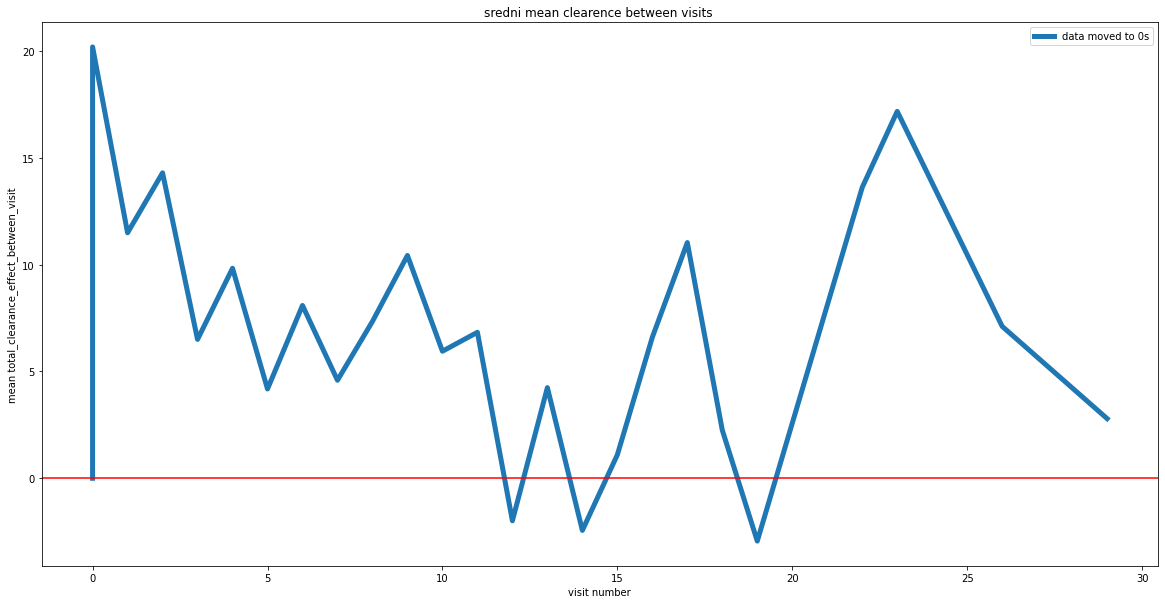

In [9]:
plt.figure(figsize=(20,10))
plt.title("srednia poprawa miedzy wizytami")
agg_column_graph(moved_df, label = 'data moved to 0s')
plt.legend()

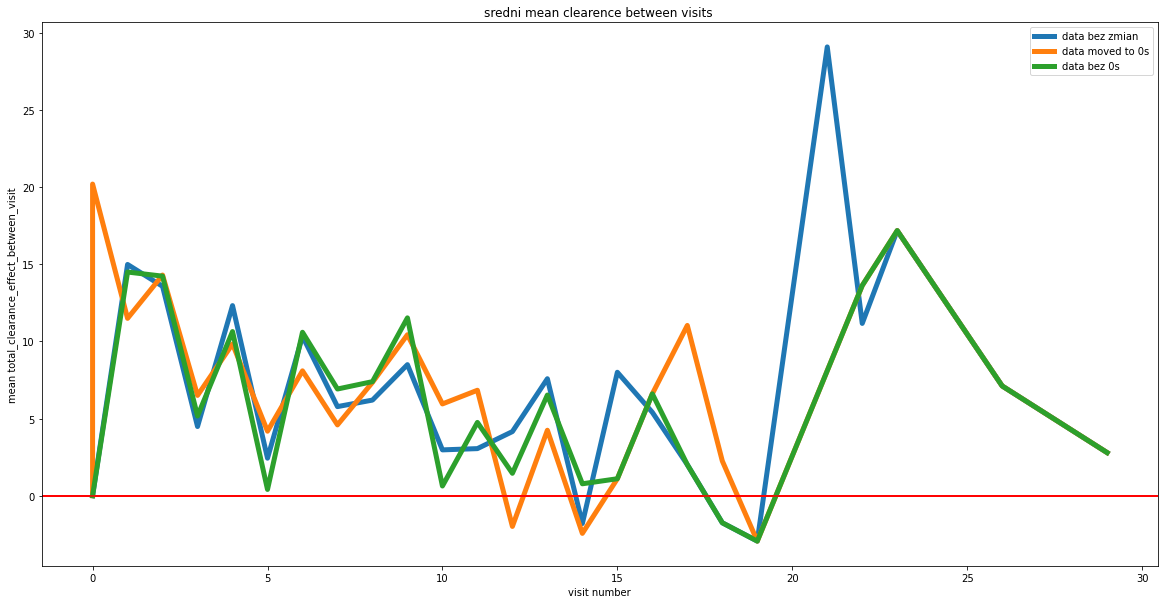

In [10]:
plt.figure(figsize=(20,10))
agg_column_graph(non_moved_df, label = 'data bez zmian', column = 'total_clearance_effect_between_visit')
agg_column_graph(moved_df, label = 'data moved to 0s', column = 'total_clearance_effect_between_visit')
agg_column_graph(non0s_df, label = 'data bez 0s', column = 'total_clearance_effect_between_visit')

### Showcase of how tests works:

In [11]:
chi_squared_test(non_moved_df.loc[non_moved_df['visit_number']> 0], name = 'example test', display_data = False)


p-value of chi squred contigency test for example test: 0.3685204437494993 (w. Yates correction - good practice)


No handles with labels found to put in legend.


Pearsons correlation of the linear fit for : -0.526 (very bad practice though)
p-value of chi squred contigency test for : 0.355108353573285 (w. Yates correction - good practice)



,nr_visit_group,patients_in_bucket
0,0,160
1,10,96
2,20,17


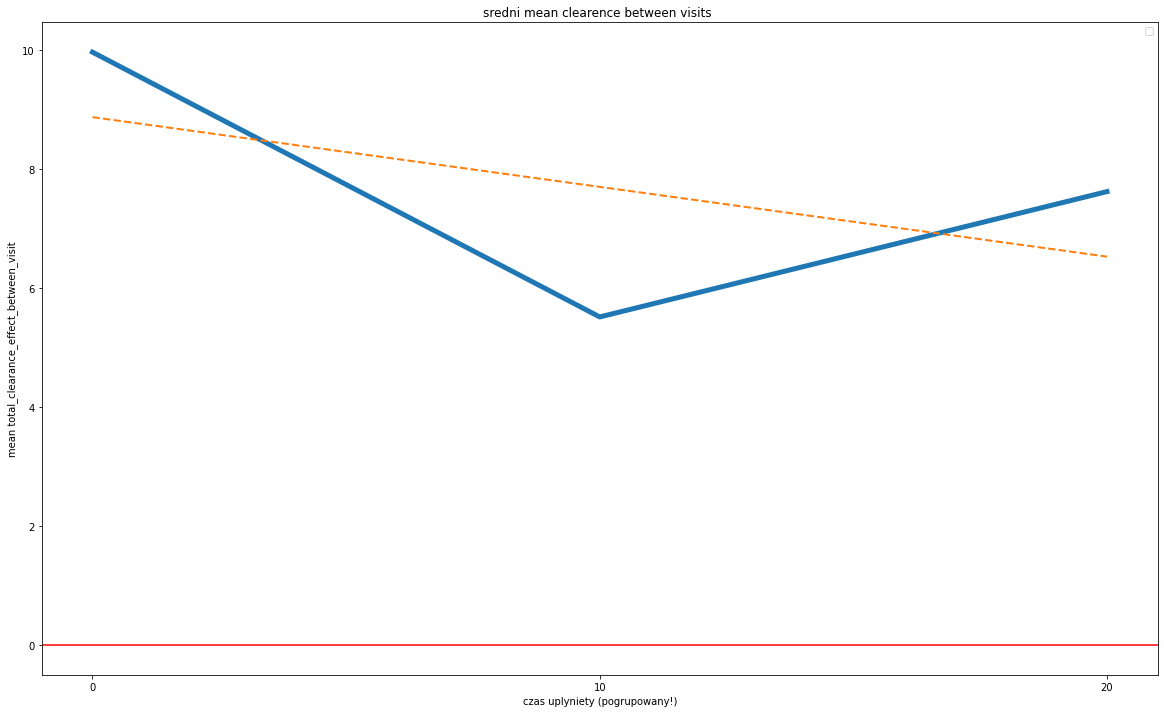

In [12]:
plt.figure(figsize=(20,12))
time_group_based_avg_graph(moved_df, 
                           GROUPS = [0,10,20], 
                           increment = 10, 
                           display_data_for_chi_square_test = False, 
                           base_column = 'nr_visit_group',
                           column = 'total_clearance_effect_between_visit')

Pearsons correlation of the linear fit for nie przesunieci: -0.521 (very bad practice though)
p-value of chi squred contigency test for nie przesunieci: 0.2351328432698879 (w. Yates correction - good practice)

Pearsons correlation of the linear fit for przesunieci: -0.686 (very bad practice though)
p-value of chi squred contigency test for przesunieci: 0.09942573985528746 (w. Yates correction - good practice)

Pearsons correlation of the linear fit for usunieci bez 1 wizyty: -0.695 (very bad practice though)
p-value of chi squred contigency test for usunieci bez 1 wizyty: 0.19369262823650013 (w. Yates correction - good practice)



,nr_visit_group,patients_in_bucket nie przesunieci
0,0,65
1,5,108
2,10,62
3,15,27
4,20,11


Text(0.5, 0, 'nr_visits_group')

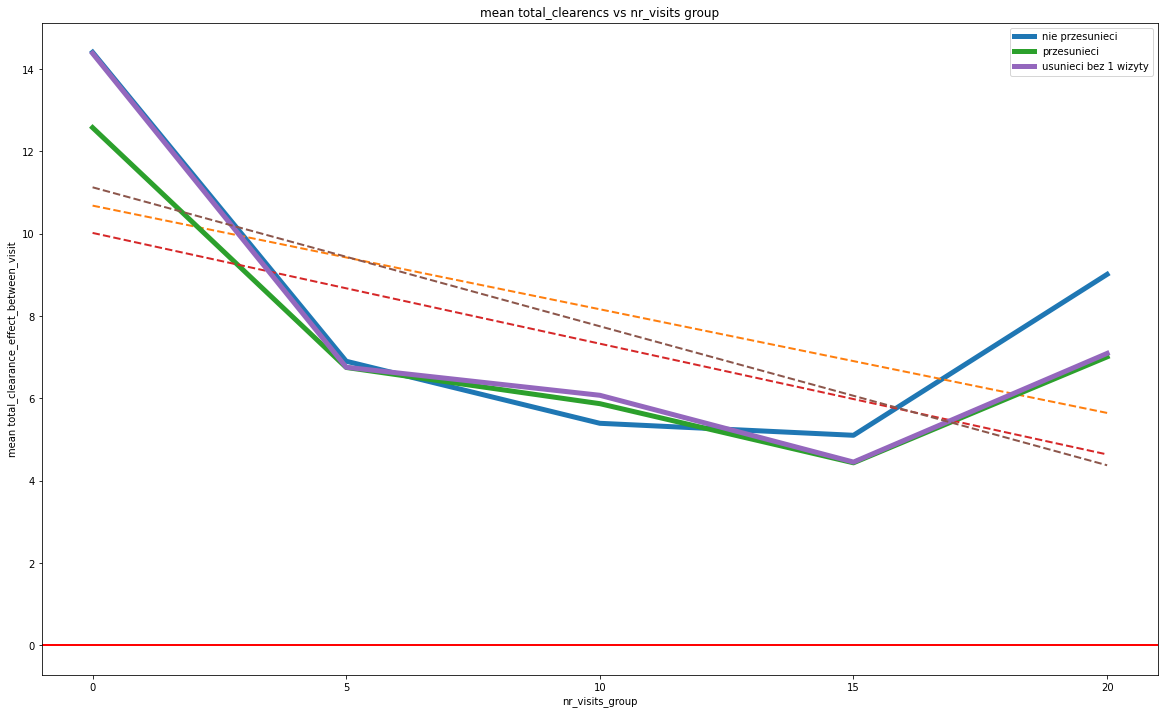

In [13]:
plt.figure(figsize=(20,12))
a = time_group_based_avg_graph(non_moved_df, 
                           GROUPS = [0,5,10,15,20], 
                           increment = 5, 
                           display_data_for_chi_square_test = False, 
                           base_column = 'nr_visit_group',
                           column = 'total_clearance_effect_between_visit',
                           label = 'nie przesunieci')
time_group_based_avg_graph(moved_df, 
                           GROUPS = [0,5,10,15,20], 
                           increment = 5, 
                           display_data_for_chi_square_test = False, 
                           base_column = 'nr_visit_group',
                           column = 'total_clearance_effect_between_visit',
                           label = 'przesunieci')

time_group_based_avg_graph(non0s_df, 
                           GROUPS = [0,5,10,15,20], 
                           increment = 5, 
                           display_data_for_chi_square_test = False, 
                           base_column = 'nr_visit_group',
                           column = 'total_clearance_effect_between_visit',
                           label = 'usunieci bez 1 wizyty')
display(a)
plt.title('mean total_clearencs vs nr_visits group')
plt.xlabel('nr_visits_group')

## Time Group based avg graphs:
* Removed graphs for patients after 15th and 20th visit - since there is barely any data there

Pearsons correlation of the linear fit for wizyty 10 i dalsze: -0.633 (very bad practice though)
p-value of chi squred contigency test for wizyty 10 i dalsze: 0.5115775011944241 (w. Yates correction - good practice)

Pearsons correlation of the linear fit for wizyty 5 i dalsze: -0.945 (very bad practice though)
p-value of chi squred contigency test for wizyty 5 i dalsze: 0.9178633451015068 (w. Yates correction - good practice)

Pearsons correlation of the linear fit for wizyty 3 i dalsze: -0.837 (very bad practice though)
p-value of chi squred contigency test for wizyty 3 i dalsze: 0.8420306157617362 (w. Yates correction - good practice)

Pearsons correlation of the linear fit for wizyty 0 i dalsze: -0.854 (very bad practice though)
p-value of chi squred contigency test for wizyty 0 i dalsze: 0.7300327873200272 (w. Yates correction - good practice)



,time_group,patients_in_bucket wizyty 10 i dalsze,patients_in_bucket wizyty 5 i dalsze,patients_in_bucket wizyty 3 i dalsze,patients_in_bucket wizyty 0 i dalsze
0,0,45,83,109,148
1,100,14,57,77,99
2,200,9,20,22,26


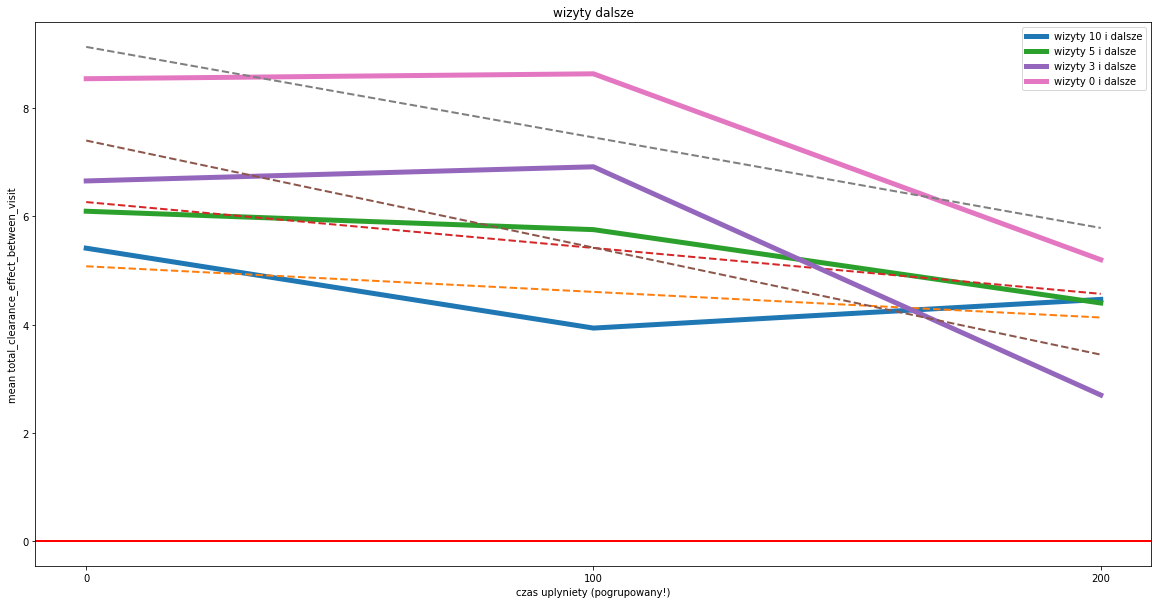

In [14]:
graph_multiple_time_group_based_avg_graph(non_moved_df,blizsze = False, GROUPS = [0,100,200], increment = 100)

Pearsons correlation of the linear fit for wizyty 10 i dalsze: 1.000 (very bad practice though)
p-value of chi squred contigency test for wizyty 10 i dalsze: 0.8872732996221597 (w. Yates correction - good practice)

Pearsons correlation of the linear fit for wizyty 5 i dalsze: 0.860 (very bad practice though)
p-value of chi squred contigency test for wizyty 5 i dalsze: nan (w. Yates correction - good practice)

Pearsons correlation of the linear fit for wizyty 3 i dalsze: -0.872 (very bad practice though)
p-value of chi squred contigency test for wizyty 3 i dalsze: 0.417763144300346 (w. Yates correction - good practice)

Pearsons correlation of the linear fit for wizyty 0 i dalsze: -0.891 (very bad practice though)
p-value of chi squred contigency test for wizyty 0 i dalsze: 0.25712630423285493 (w. Yates correction - good practice)



,time_group,patients_in_bucket wizyty 10 i dalsze,patients_in_bucket wizyty 5 i dalsze,patients_in_bucket wizyty 3 i dalsze,patients_in_bucket wizyty 0 i dalsze
0,0,56,126,168,225
1,200,12,33,37,43
2,400,0,1,3,5


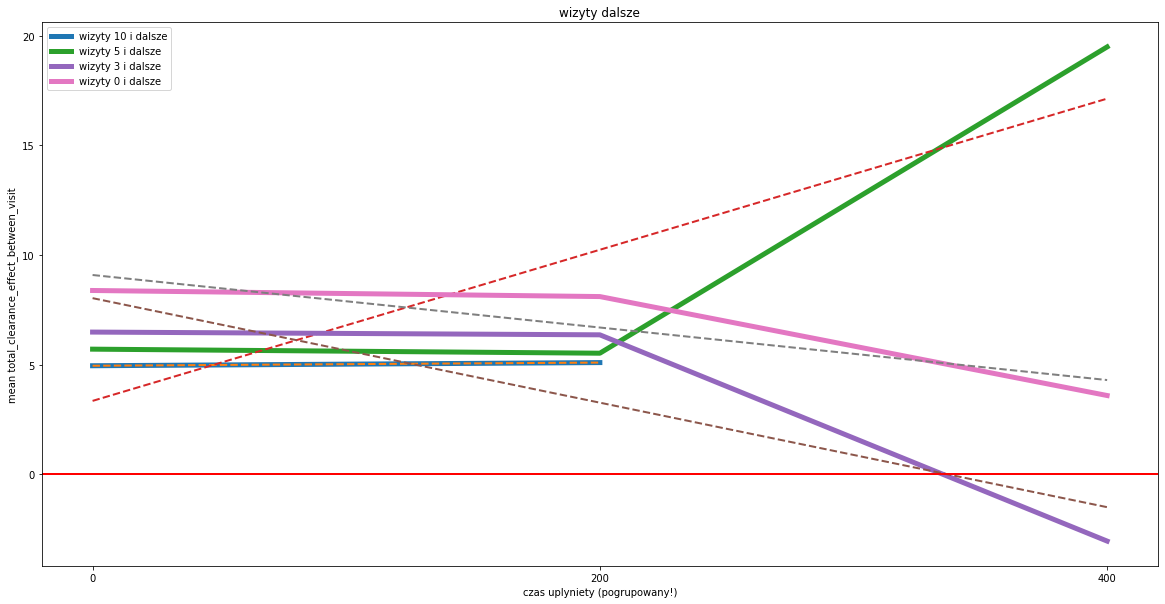

In [15]:
graph_multiple_time_group_based_avg_graph(non_moved_df,blizsze = False, GROUPS = [0,200,400], increment = 200)

In [16]:
# graph_multiple_time_group_based_avg_graph(non_moved_df,blizsze = False, GROUPS = [0,100,200,300], increment = 100) # I dont like this one

Pearsons correlation of the linear fit for wizyty 10 i dalsze: -0.440 (very bad practice though)
p-value of chi squred contigency test for wizyty 10 i dalsze: 0.41090828147252967 (w. Yates correction - good practice)

Pearsons correlation of the linear fit for wizyty 5 i dalsze: 0.627 (very bad practice though)
p-value of chi squred contigency test for wizyty 5 i dalsze: nan (w. Yates correction - good practice)

Pearsons correlation of the linear fit for wizyty 3 i dalsze: -0.890 (very bad practice though)
p-value of chi squred contigency test for wizyty 3 i dalsze: 0.6202235831412108 (w. Yates correction - good practice)

Pearsons correlation of the linear fit for wizyty 0 i dalsze: -0.891 (very bad practice though)
p-value of chi squred contigency test for wizyty 0 i dalsze: 0.3668887683847947 (w. Yates correction - good practice)



,time_group,patients_in_bucket wizyty 10 i dalsze,patients_in_bucket wizyty 5 i dalsze,patients_in_bucket wizyty 3 i dalsze,patients_in_bucket wizyty 0 i dalsze
0,0,47,95,124,173
1,120,13,49,66,79
2,240,8,15,15,16
3,360,0,1,3,5


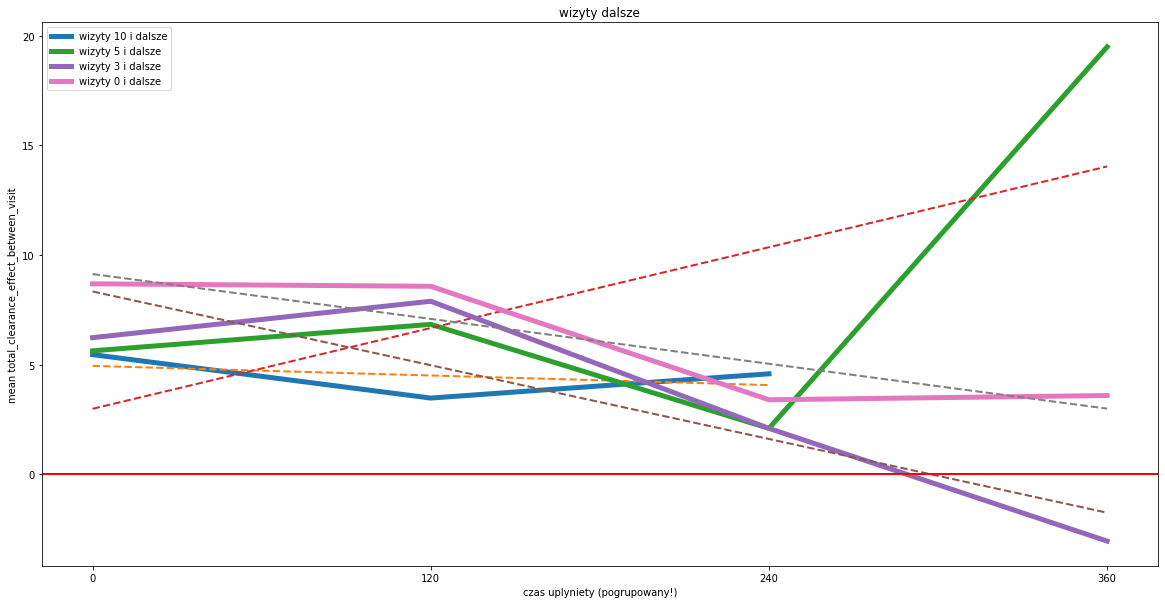

In [17]:
graph_multiple_time_group_based_avg_graph(non_moved_df,blizsze = False, GROUPS = [0,120,240,360], increment = 120)

Pearsons correlation of the linear fit for wizyty 10 i dalsze: -0.499 (very bad practice though)
p-value of chi squred contigency test for wizyty 10 i dalsze: 0.47476210424636156 (w. Yates correction - good practice)

Pearsons correlation of the linear fit for wizyty 5 i dalsze: 0.345 (very bad practice though)
p-value of chi squred contigency test for wizyty 5 i dalsze: nan (w. Yates correction - good practice)

Pearsons correlation of the linear fit for wizyty 3 i dalsze: -0.736 (very bad practice though)
p-value of chi squred contigency test for wizyty 3 i dalsze: 0.4605667986344202 (w. Yates correction - good practice)

Pearsons correlation of the linear fit for wizyty 0 i dalsze: -0.613 (very bad practice though)
p-value of chi squred contigency test for wizyty 0 i dalsze: 0.3685204437494993 (w. Yates correction - good practice)



,time_group,patients_in_bucket wizyty 10 i dalsze,patients_in_bucket wizyty 5 i dalsze,patients_in_bucket wizyty 3 i dalsze,patients_in_bucket wizyty 0 i dalsze
0,0,41,77,98,131
1,90,17,58,82,109
2,180,8,18,19,21
3,270,2,6,6,7
4,360,0,1,3,5


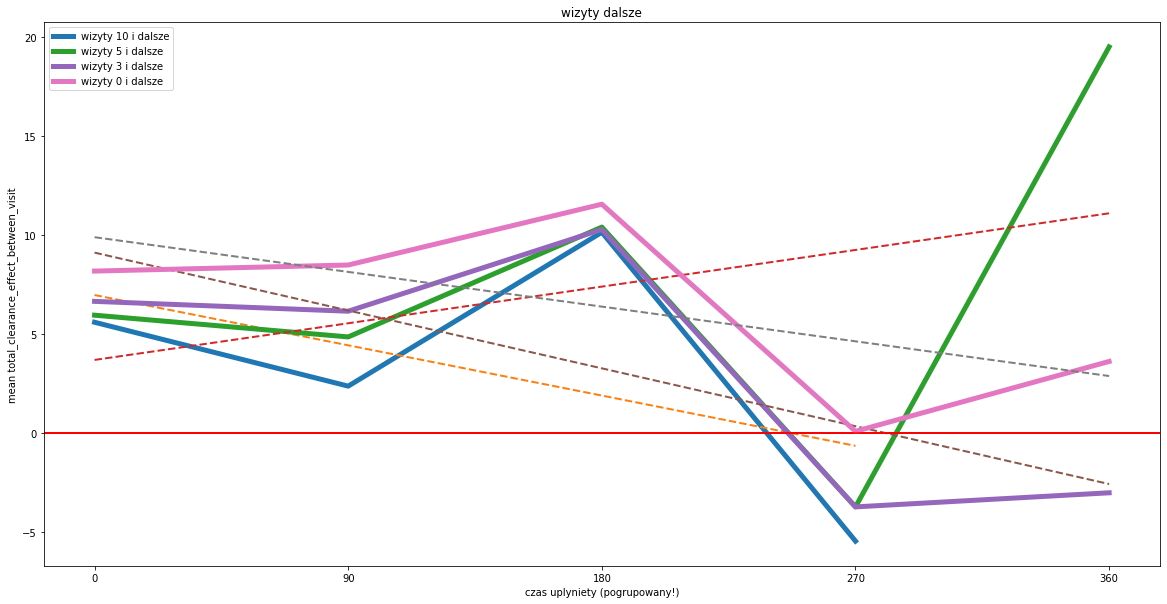

In [18]:
graph_multiple_time_group_based_avg_graph(non_moved_df,blizsze = False, GROUPS = [0,90,180,270,360], increment=90)

Pearsons correlation of the linear fit for wizyty 10 i dalsze: -0.217 (very bad practice though)
p-value of chi squred contigency test for wizyty 10 i dalsze: nan (w. Yates correction - good practice)

Pearsons correlation of the linear fit for wizyty 5 i dalsze: -0.022 (very bad practice though)
p-value of chi squred contigency test for wizyty 5 i dalsze: nan (w. Yates correction - good practice)

Pearsons correlation of the linear fit for wizyty 3 i dalsze: -0.574 (very bad practice though)
p-value of chi squred contigency test for wizyty 3 i dalsze: nan (w. Yates correction - good practice)

Pearsons correlation of the linear fit for wizyty 0 i dalsze: -0.580 (very bad practice though)
p-value of chi squred contigency test for wizyty 0 i dalsze: nan (w. Yates correction - good practice)



,time_group,patients_in_bucket wizyty 10 i dalsze,patients_in_bucket wizyty 5 i dalsze,patients_in_bucket wizyty 3 i dalsze,patients_in_bucket wizyty 0 i dalsze
0,0,1,1,1,1
1,30,40,76,97,130
2,60,13,32,48,68
3,90,3,20,25,29
4,120,1,6,9,12
5,150,1,6,7,8
6,180,4,8,8,9
7,210,3,4,4,4
8,240,1,3,3,4
9,270,1,2,2,2


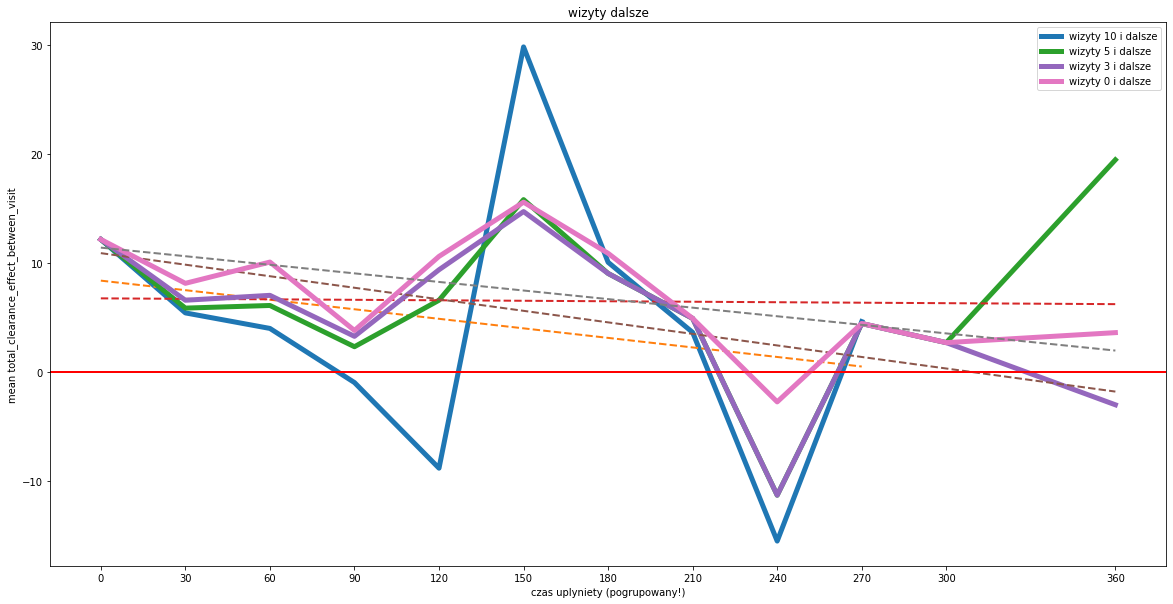

In [19]:
graph_multiple_time_group_based_avg_graph(non_moved_df,blizsze = False, GROUPS = [0,30,60,90,120,150,180,210,240,270,300,330,360], increment=30)

### All users plots:

In [20]:
# plot_all_users(non_moved_df, title = 'data bez zmian')
# plot_all_users(moved_df, title = 'data moved to 0s')
# plot_all_users(non0s_df, title = 'data bez 0s')

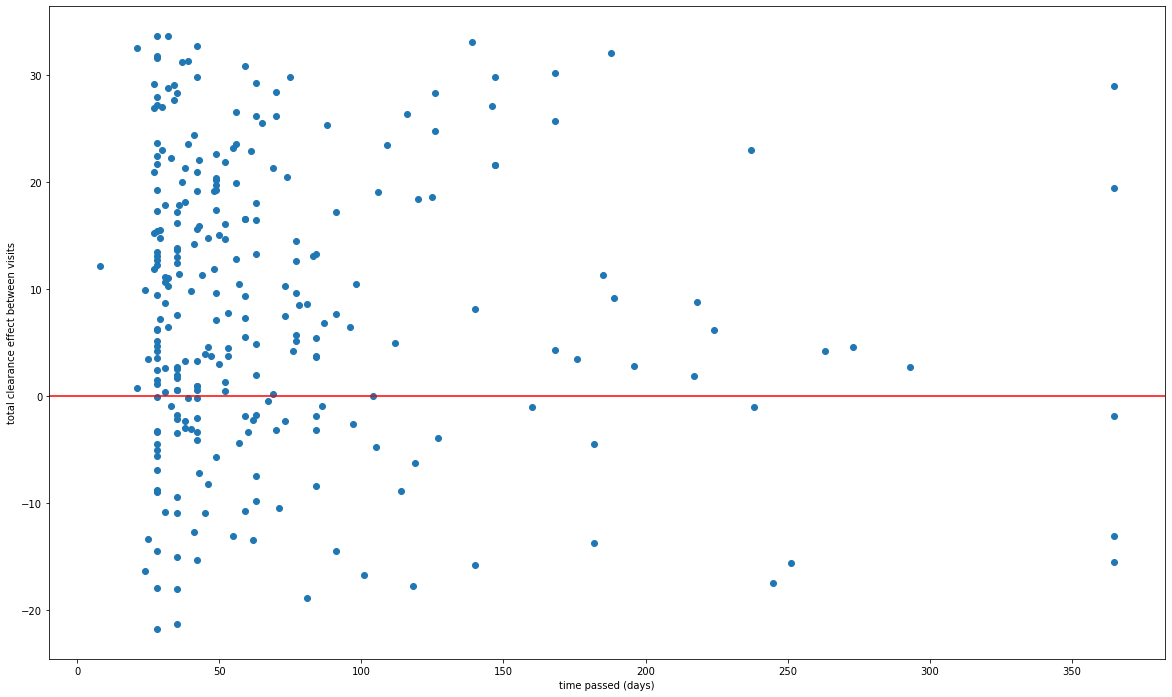

In [21]:
plt.figure(figsize=(20,12))
scatter_plot_against_time(non_moved_df, label = 'before or 5th visit', label2 ='line fit to ALL data' ,plot_linear_fit = False)

## Scatter plots - dependent on visit:

Pearsons correlation: -0.087


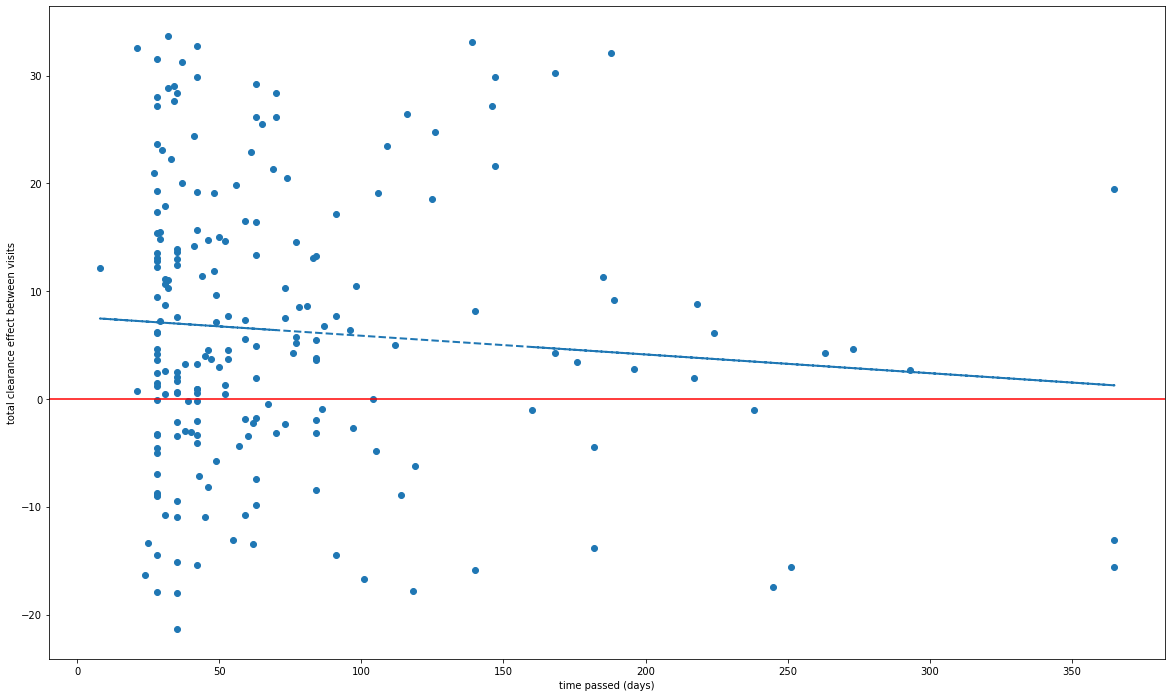

In [22]:
plt.figure(figsize=(20,12))
scatter_plot_against_time(non_moved_df.loc[non_moved_df['visit_number'] > 2], label = 'before or 5th visit', label2 ='line fit to ALL data' ,plot_linear_fit = True)

## Scatter plots - dependent on visit:

In [23]:
non_moved_df

,surname,time,summed_time,time_group,visit_number,total_clearance_effect_between_visit,total_clearence_effect_wzgledem_poczatku,------------,nr_visit_group,below 0
0,1.Gasek,57,57,4,1,10.435940,10.435942,,0,False
1,1.Gasek,958,1015,4,2,-1.909880,8.725376,,0,True
2,1.Gasek,70,1085,4,3,-3.152340,5.848092,,1,True
3,1.Gasek,63,1148,4,4,26.204230,30.519873,,1,False
4,1.Gasek,238,1386,4,5,-0.996100,29.827784,,1,True
...,...,...,...,...,...,...,...,...,...,...
415,70. Wójcicki,84,255,4,6,-1.909880,75.286637,,1,True
416,70. Wójcicki,84,339,4,7,-3.152340,69.913296,,1,True
417,70. Wójcicki,70,409,4,8,26.204230,83.173308,,2,False
418,70. Wójcicki,160,569,4,9,-0.996100,74.593279,,2,True


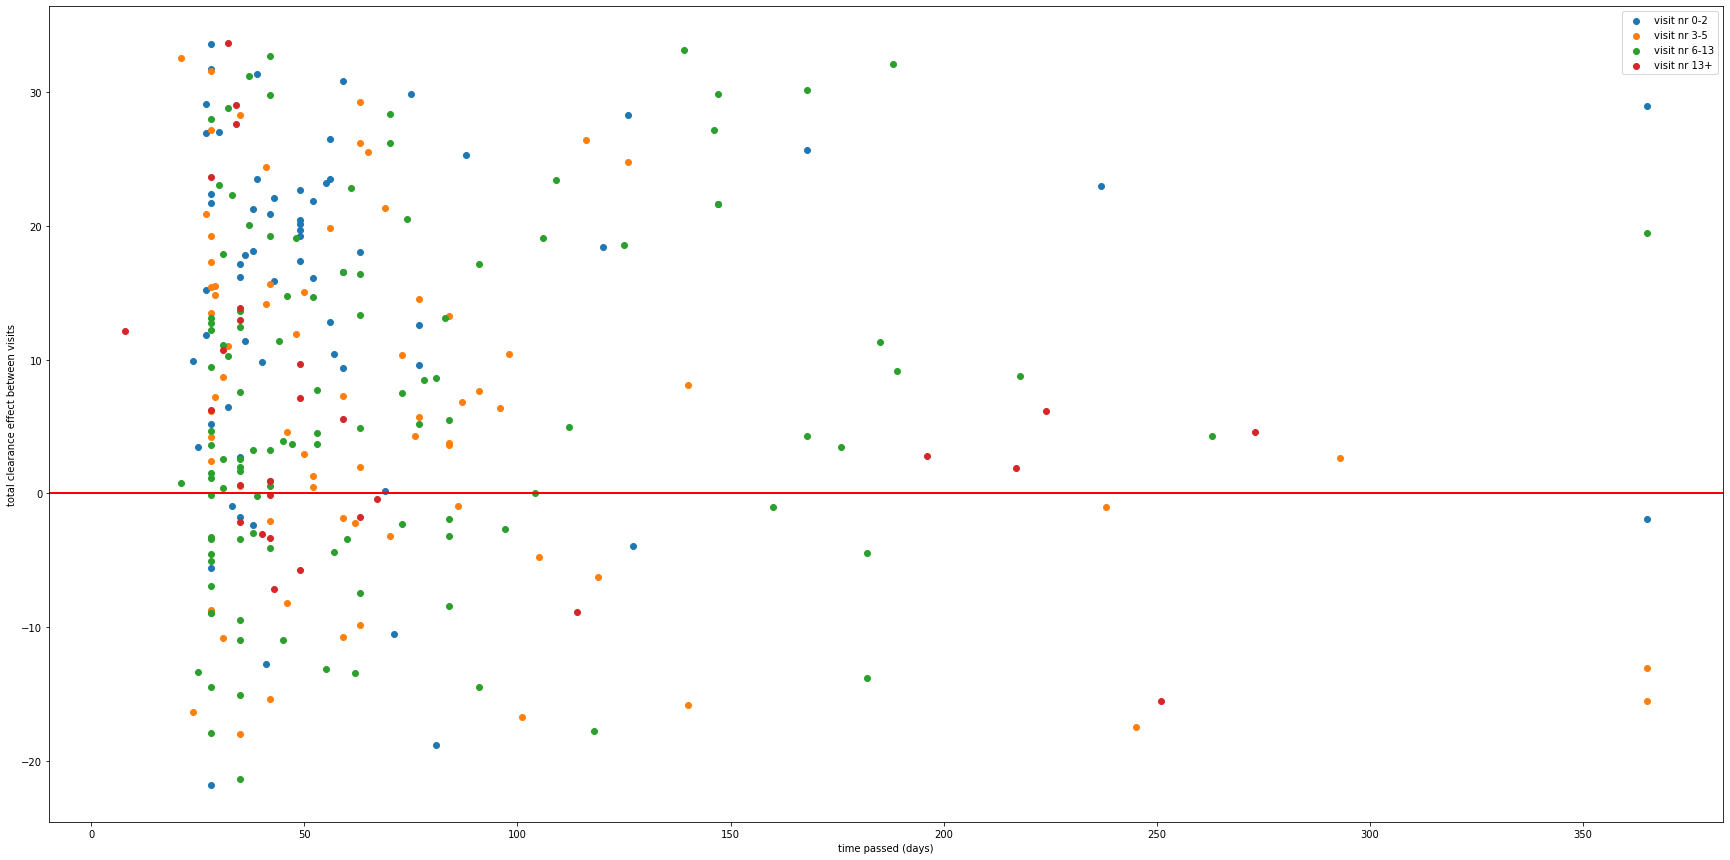

In [24]:
plt.figure(figsize=(30,15))

df1 = non_moved_df.loc[non_moved_df['visit_number'].isin([1,2])]
df2 = non_moved_df.loc[non_moved_df['visit_number'].isin([3,4,5])]
df3 = non_moved_df.loc[non_moved_df['visit_number'].isin([6,7,8,9,10,11,12,13])]
df5 = non_moved_df.loc[non_moved_df['visit_number'] > 13]


scatter_plot_against_time(df1, label = 'visit nr 0-2', plot_linear_fit= False)
scatter_plot_against_time(df2, label = 'visit nr 3-5', plot_linear_fit= False)
scatter_plot_against_time(df3, label = 'visit nr 6-13', plot_linear_fit= False)
scatter_plot_against_time(df5, label = 'visit nr 13+', plot_linear_fit= False)
plt.legend()

In [25]:
weird_data = non_moved_df.loc[(non_moved_df['below 0'] == True) & (non_moved_df['time'] <75)] # Send to Michal & Professor
weird_data.to_excel('dziwne_badania.xlsx')

Pearsons correlation: -0.065
Pearsons correlation: -0.087


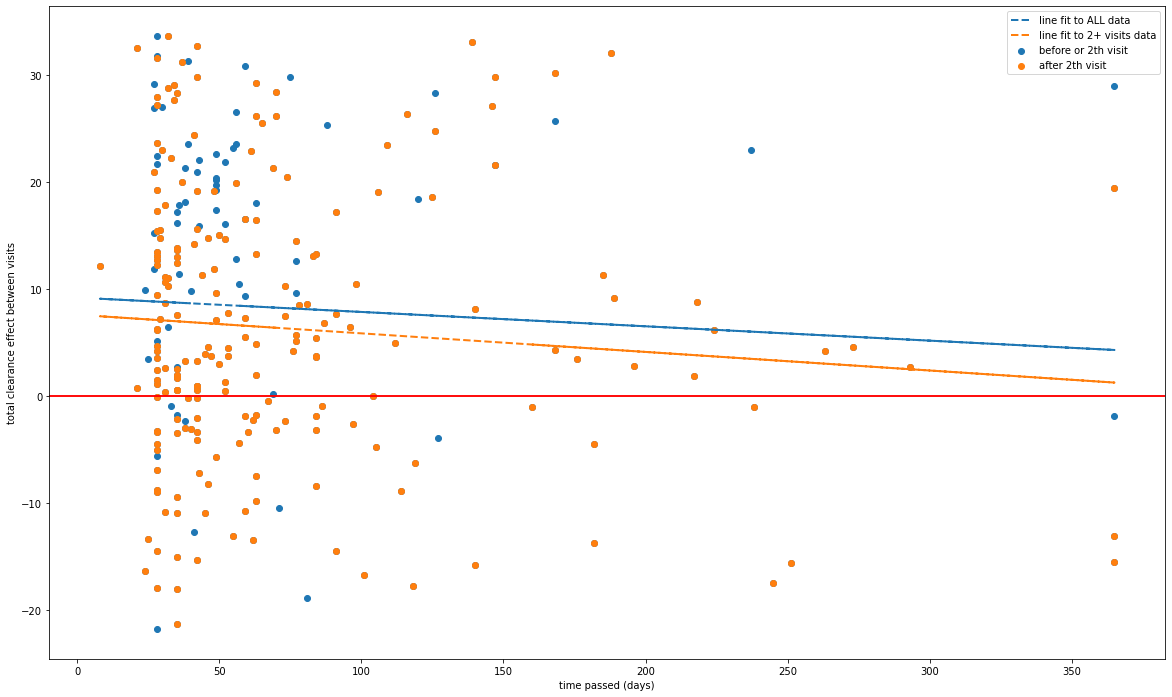

In [26]:
plt.figure(figsize=(20,12))
scatter_plot_against_time(non_moved_df, label = 'before or 2th visit', label2 ='line fit to ALL data')
scatter_plot_against_time(non_moved_df.loc[non_moved_df['visit_number'] > 2], label = 'after 2th visit', label2= 'line fit to 2+ visits data')
plt.legend()

If time was longer than 360 I changed it to 360 to keep graph readable 

Pearsons correlation: -0.065
Pearsons correlation: 0.072


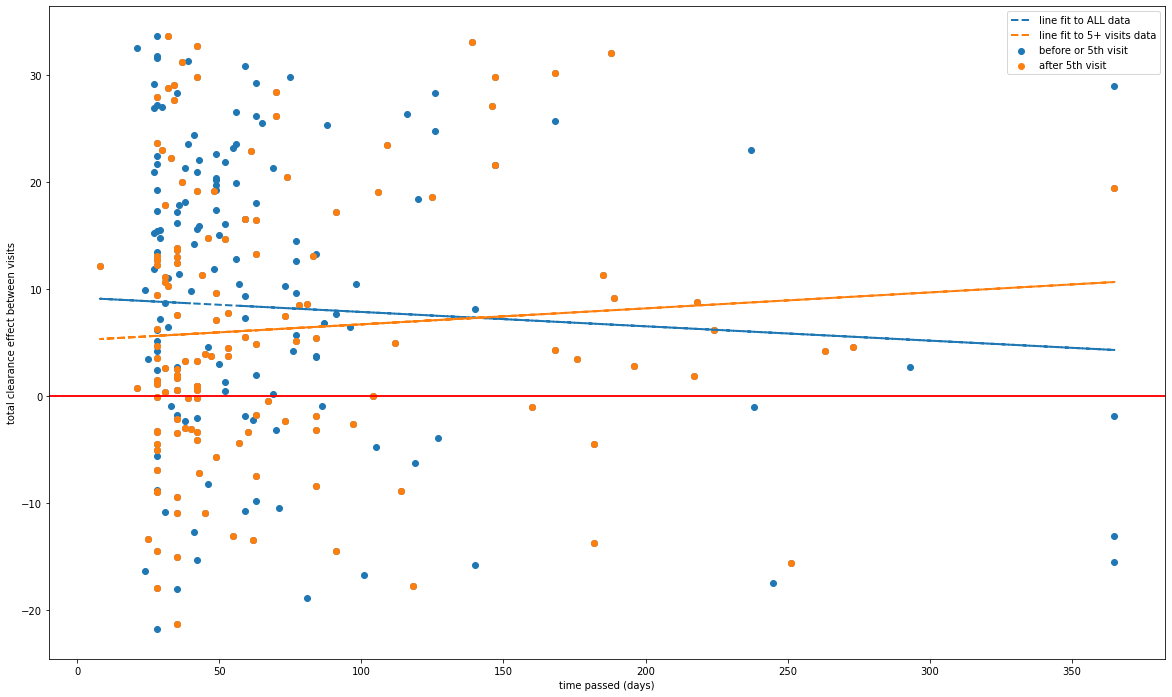

In [27]:
print('If time was longer than 360 I changed it to 360 to keep graph readable \n')

plt.figure(figsize=(20,12))
scatter_plot_against_time(non_moved_df, label = 'before or 5th visit', label2 ='line fit to ALL data')
scatter_plot_against_time(non_moved_df.loc[non_moved_df['visit_number'] > 5], label = 'after 5th visit', label2= 'line fit to 5+ visits data')
plt.legend()

Pearsons correlation: -0.065
Pearsons correlation: -0.104


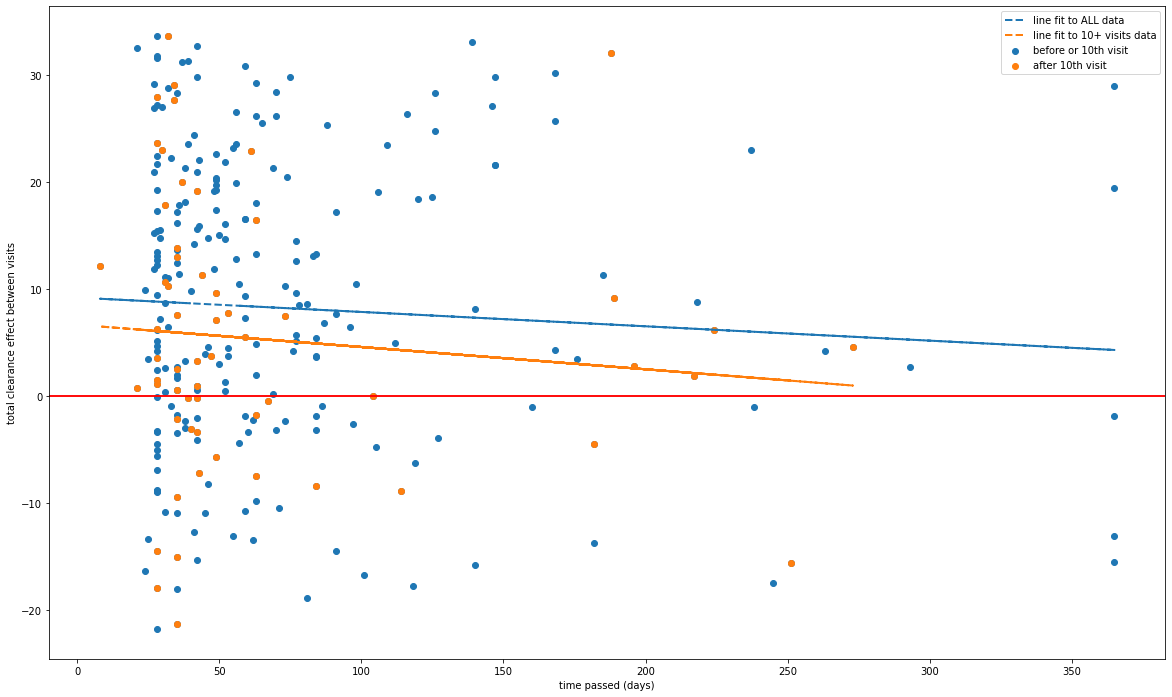

In [28]:
plt.figure(figsize=(20,12))
scatter_plot_against_time(non_moved_df, label = 'before or 10th visit', label2 ='line fit to ALL data')
scatter_plot_against_time(non_moved_df.loc[non_moved_df['visit_number'] > 10], label = 'after 10th visit', label2= 'line fit to 10+ visits data')
plt.legend()

Pearsons correlation: -0.065
Pearsons correlation: -0.239


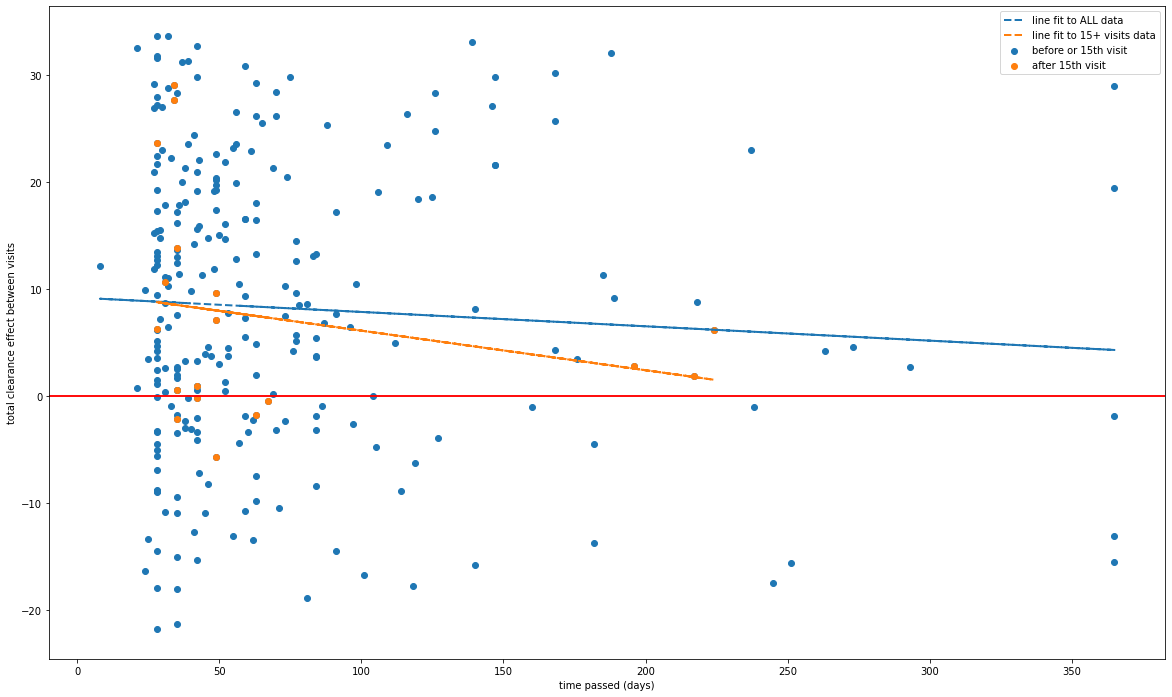

In [29]:
plt.figure(figsize=(20,12))
scatter_plot_against_time(non_moved_df, label = 'before or 15th visit', label2 ='line fit to ALL data')
scatter_plot_against_time(non_moved_df.loc[non_moved_df['visit_number'] > 15], label = 'after 15th visit', label2= 'line fit to 15+ visits data')
plt.legend()

### Scatted plots - divided into time groups:

/Users/szczekulskij/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:13: RankWarning: Polyfit may be poorly conditioned
  del sys.path[0]


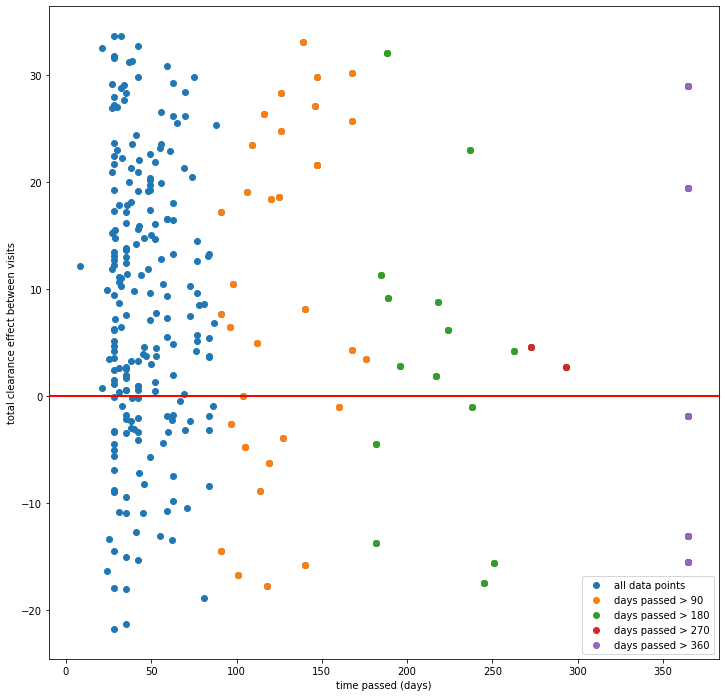

In [30]:
plt.figure(figsize=(12,12))
df0 = non_moved_df
df1 = non_moved_df.loc[non_moved_df['time'] > 90]
df2 = non_moved_df.loc[non_moved_df['time'] > 180]
df3 = non_moved_df.loc[non_moved_df['time'] > 270]
df4 = non_moved_df.loc[non_moved_df['time'] > 360]


scatter_plot_against_time(df0, label = 'all data points', label2 ='line fit to ALL data',plot_linear_fit = False)
scatter_plot_against_time(df1, label = 'days passed > 90', label2 ='',plot_linear_fit = False)
scatter_plot_against_time(df2, label = 'days passed > 180', label2 ='',plot_linear_fit = False)
scatter_plot_against_time(df3, label = 'days passed > 270', label2 ='',plot_linear_fit = False)
scatter_plot_against_time(df4, label = 'days passed > 360', label2 ='',plot_linear_fit = False)
plt.legend()

Pearsons correlation: -0.065
Pearsons correlation: -0.117
Pearsons correlation: -0.056
Pearsons correlation: -0.006


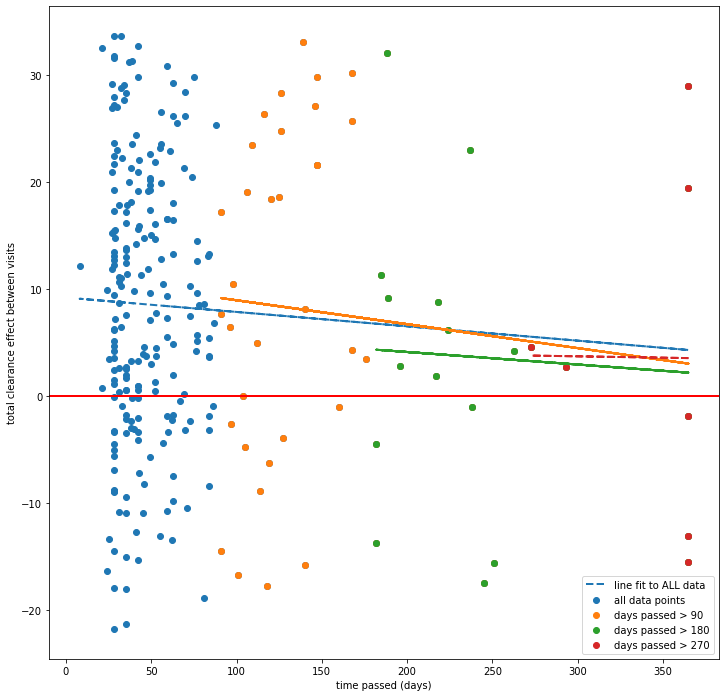

In [31]:
plt.figure(figsize=(12,12))
df0 = non_moved_df
df1 = non_moved_df.loc[non_moved_df['time'] > 90]
df2 = non_moved_df.loc[non_moved_df['time'] > 180]
df3 = non_moved_df.loc[non_moved_df['time'] > 270]


scatter_plot_against_time(df0, label = 'all data points', label2 ='line fit to ALL data')
scatter_plot_against_time(df1, label = 'days passed > 90', label2 ='')
scatter_plot_against_time(df2, label = 'days passed > 180', label2 ='')
scatter_plot_against_time(df3, label = 'days passed > 270', label2 ='')
plt.legend()

## Scatter plots - clearnce vs visit_nr

Pearsons correlation: -0.158


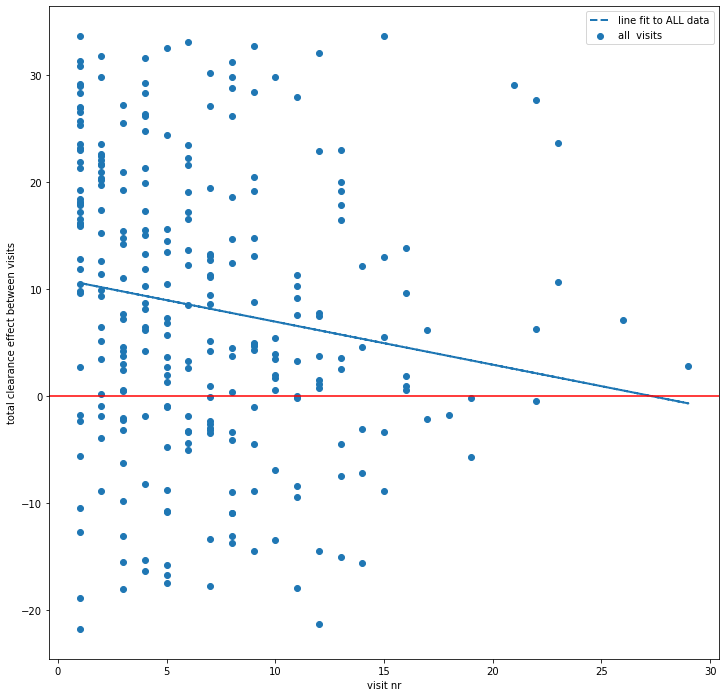

In [32]:
plt.figure(figsize=(12,12))
scatter_plot_against_visit_nr(non_moved_df, label = 'all  visits', label2 ='line fit to ALL data')
plt.legend()

##### Botplox explained:
<img src="boxplot_explained.png"
     alt="boxplot explained"/>

No handles with labels found to put in legend.


<Figure size 864x864 with 0 Axes>

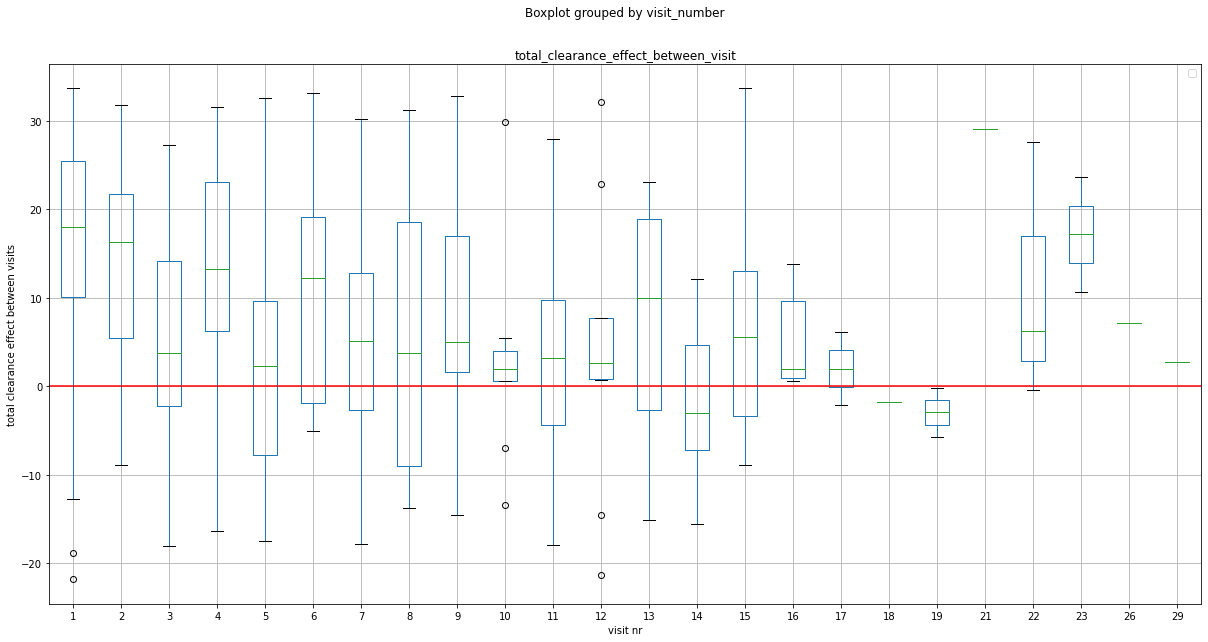

In [33]:
plt.figure(figsize=(12,12))
scatter_plot_against_visit_nr(non_moved_df, label = 'all  visits', label2 ='line fit to ALL data', plot_type='box', plot_linear_fit = False)
plt.legend()

Pearsons correlation: -0.027


<Figure size 864x864 with 0 Axes>

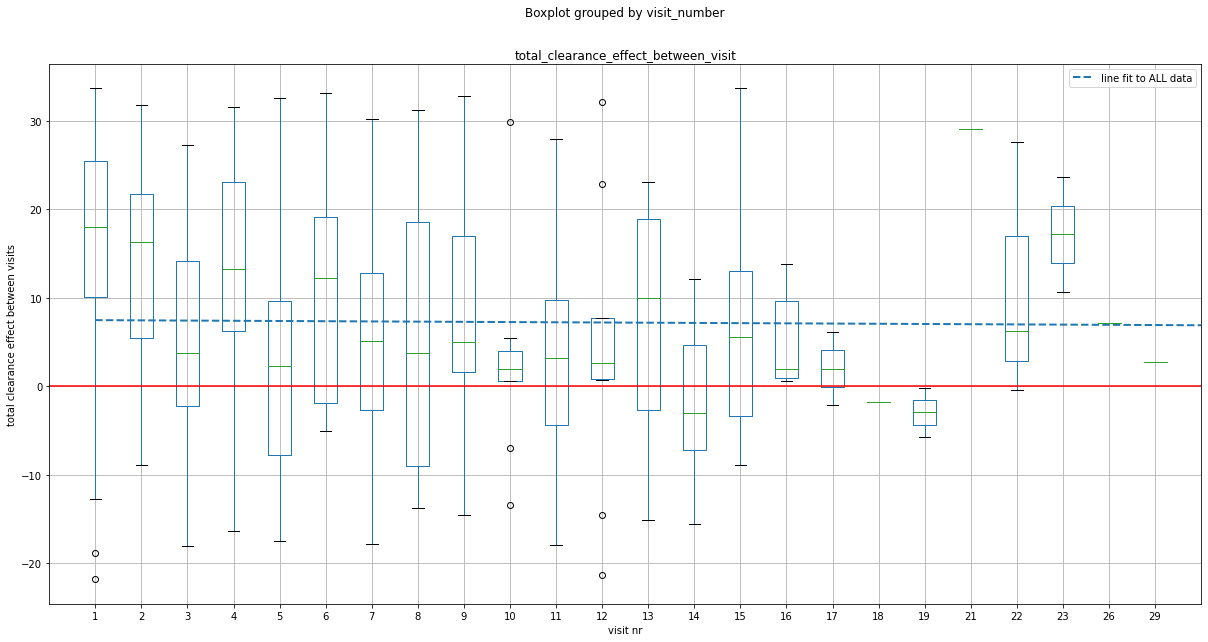

In [34]:
plt.figure(figsize=(12,12))
scatter_plot_against_visit_nr(non_moved_df, label = 'all  visits', label2 ='line fit to ALL data', plot_type='box', plot_linear_fit = True)
plt.legend()

### Statistical comparison of the means between 2 samples (data divided based on time)

In [35]:

for days_passed_threshold in [60,120,180,240,300,360]:
    print()
    ttest_against_time_threshold(non_moved_df, 
                                 time_threshold = days_passed_threshold, 
                                 related_ttest = False)




test for days passsed: 60
left mean: 8.69
right mean: 7.5
p_value: 0.2402


test for days passsed: 120
left mean: 8.156
right mean: 8.883
p_value: 0.6203


test for days passsed: 180
left mean: 8.654
right mean: 3.451
p_value: 0.0436


test for days passsed: 240
left mean: 8.581
right mean: -0.351
p_value: 0.0191


test for days passsed: 300
left mean: 8.341
right mean: 3.598
p_value: 0.2169


test for days passsed: 360
left mean: 8.341
right mean: 3.598
p_value: 0.2169


### Statistical comparison of the means between 2 samples (data divided based on nr of visits)

In [36]:
for visit_nr_threshold in [2,5,10,15,20,25]:
    print()
    ttest_against_time_threshold(non_moved_df,
                                 visit_nr_threshold=visit_nr_threshold, 
                                 related_ttest = False)



test for nr visits: 2
left mean: 14.411
right mean: 6.33
p_value: 0.0


test for nr visits: 5
left mean: 10.262
right mean: 6.29
p_value: 0.007


test for nr visits: 10
left mean: 9.072
right mean: 5.288
p_value: 0.0273


test for nr visits: 15
left mean: 8.326
right mean: 7.232
p_value: 0.3691


test for nr visits: 20
left mean: 8.1
right mean: 13.348
p_value: 0.8621


test for nr visits: 25
left mean: 8.279
right mean: 4.95
p_value: 0.3635


# Exploratory area: